# Statistiche CalenPIario 2023

- Problemi: https://www.calenpiario.it/index.php?a=list
- Classifica generale: https://www.calenpiario.it/index.php?a=highscore

In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
def getProblemStats(url = 'https://www.calenpiario.it/index.php?a=list'):
    r = requests.get(url)
    pical_problems = BeautifulSoup(r.text, 'html.parser')
    data = [[l.split(" (Risolto ")[0],int(l.split(" (Risolto ")[1])] 
            for l in pical_problems.text.split("\n")[22].split(" volte)")[:-1]]
    labels = [ l[0] for l in np.array(data)[:,0:1] ]
    values = [ int(l[0]) for l in np.array(data)[:,1:] ]
    return values,labels

def getScoreTable(url='https://www.calenpiario.it/index.php?a=highscore', smin=0):
    r = requests.get(url)
    pical_highscore = BeautifulSoup(r.text, 'html.parser')
    table = str(pical_highscore.find_all("table")[0])
    table = table.replace("<table><tr><td>Punteggio</td><td>Nickname</td></tr><tr>","").replace("</tr></table>","")
    table = [ [ i.replace('<td>','').replace('</td>','') for i in l.split("</td><td>") ] for l in table.split("</tr><tr>") ]
    points = []
    names  = []
    solved = []
    for l in table:
        p = l[0]
        if len(l[0])>202:
            p = l[0][202:]
        values = p.replace(' class="tg-svo0"','').replace(' class="tg-c3ow"','')
        values = values.replace('</tr></tbody></table>','')
        values = values.split("<td>")
        name  = values[2]
        point = values[4]
        solve = values[3]
        if int(solve)>=smin:
            points.append(int(point))
            names.append(name)
            solved.append(int(solve))
    return points,names,solved

Text(0.5, 1.0, 'CalenPIario - 2023-05-13 15:49')

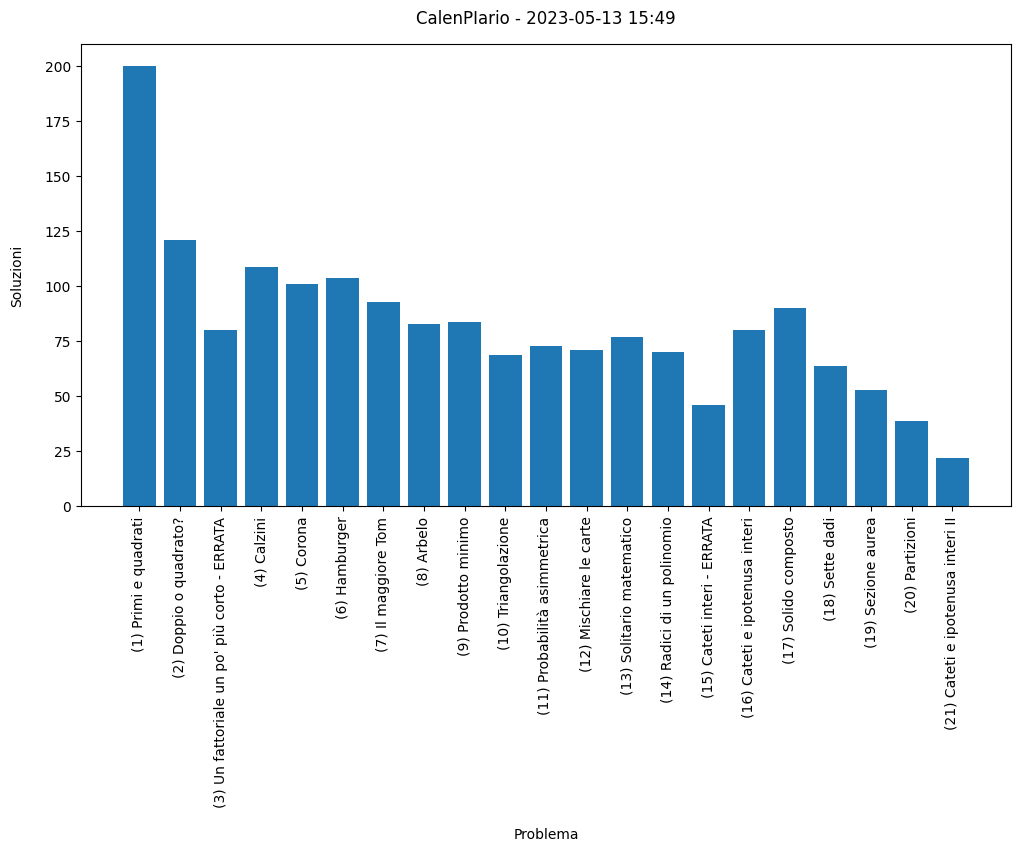

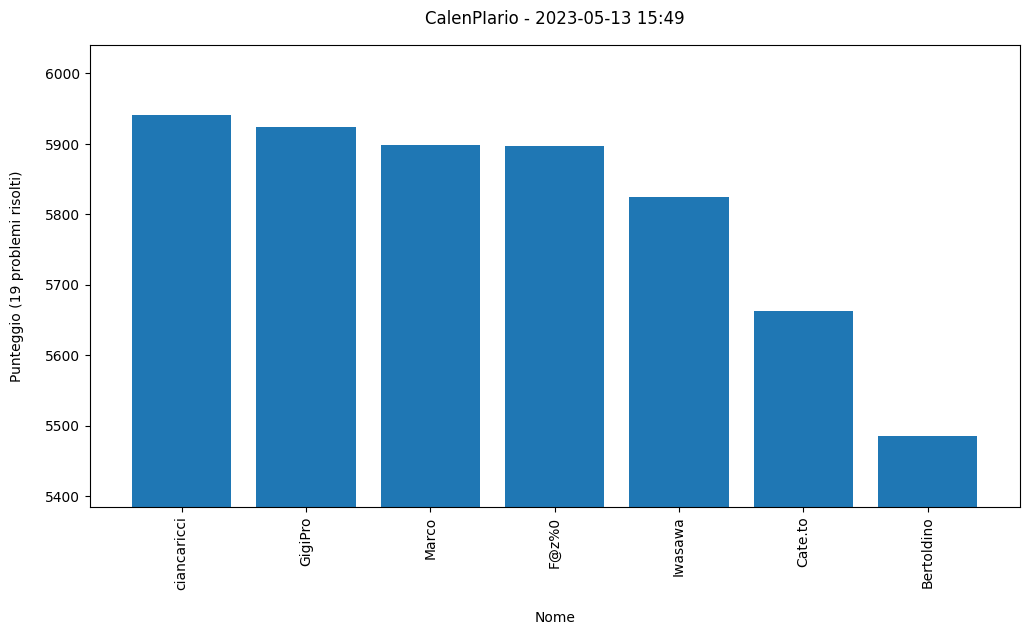

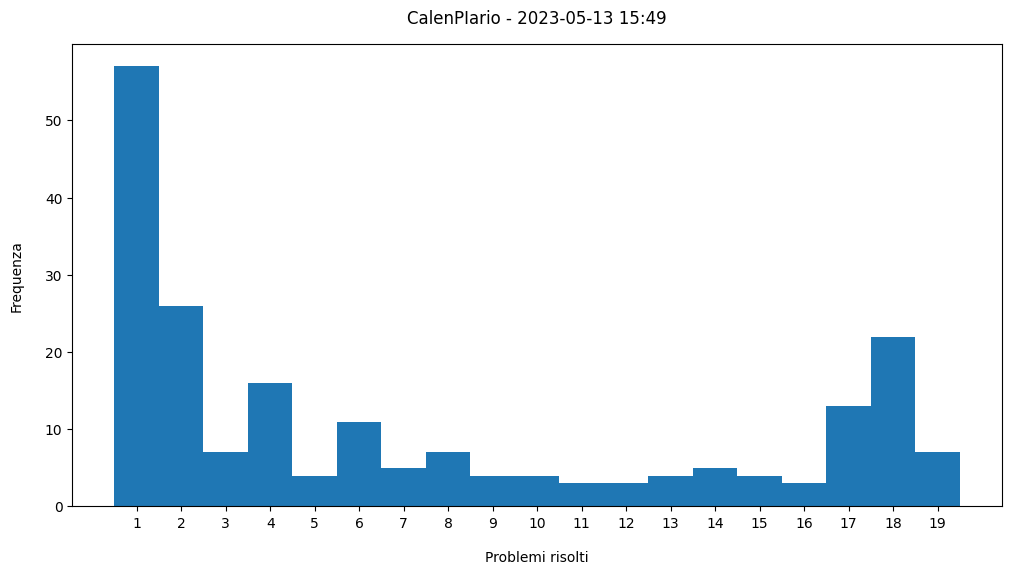

In [3]:
from collections import Counter

values,labels = getProblemStats(url = 'https://www.calenpiario.it/index.php?a=list')
points,names,solved = getScoreTable(url='https://www.calenpiario.it/index.php?a=highscore', smin=1)

now = str(datetime.datetime.now())[:16]

solved_shift = [ s-0.5 for s in solved ]
count = Counter(solved_shift)
bins = sorted(list(count.keys()))
bins = bins+[bins[-1]+1]

fig, ax = plt.subplots(figsize=(12,6),dpi=100)
plt.bar(labels,values)
plt.xticks(range(len(labels)), labels, rotation='vertical')
ax.set_xlabel('Problema', labelpad=15)
ax.set_ylabel('Soluzioni', labelpad=15)
ax.set_title('CalenPIario - {}'.format(now), pad=15)
#plt.show()

# selecting only users that solved all problems
msolv = max(solved)
names_max = [ n for n,s in zip(names,solved) if s==msolv ]
points_max = [ p for p,s in zip(points,solved) if s==msolv ]

fig, ax = plt.subplots(figsize=(12,6),dpi=100)
plt.bar(names_max,points_max)
plt.xticks(range(len(names_max)), names_max, rotation='vertical')
ax.set_xlabel('Nome', labelpad=15)
ax.set_ylabel('Punteggio ({} problemi risolti)'.format(msolv), labelpad=15)
ax.set_ylim([min(points_max)-100,max(points_max)+100])
ax.set_title('CalenPIario - {}'.format(now), pad=15)
#plt.show()

fig, ax = plt.subplots(figsize=(12,6),dpi=100)
plt.hist(solved_shift,bins=bins)
plt.xticks(np.arange(1, max(solved)+1, 1.0))
ax.set_xlabel('Problemi risolti', labelpad=15)
ax.set_ylabel('Frequenza', labelpad=15)
ax.set_title('CalenPIario - {}'.format(now), pad=15)
#plt.show()